<br>

<div style = "text-align : center">
    <center><font size = 13> P = 2 , ..., 20 다항회귀문제에서 CV를 활용한 최적의 차수찾기 </font></center>
    <img src = "./img/cv.PNG"> 
</div>


<br><br>

<div  style="text-align: right">
    <font size = 7 > 19/04/26 이성령 </font>
</div>

# Library Load

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
np.set_printoptions(threshold=np.inf)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## $y = 10sin(\frac{1}{2\pi}x) + 0.13x + \epsilon  \quad \epsilon \sim N(0,4^2)$

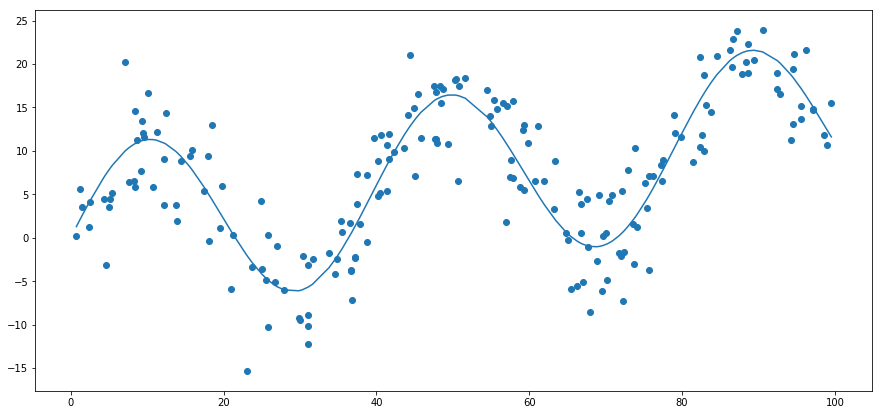

In [2]:
def nonlinear_1(x ) :
    true = 10*np.sin(1/(2*np.pi)*x) + 0.13*x
    y    = true + np.random.normal(loc=0 , scale= 4 , size = len(x))
    return  y

train_n  = 200
x = np.random.uniform(low=0, high=100,  size= train_n )
x = np.sort(x)
true = 10*np.sin(1/(2*np.pi)*x) + 0.13*x
y= nonlinear_1(x)
fig = plt.figure(figsize=(15, 7))
plt.plot(x,true) 
plt.scatter(x,y) ; 

# K = 10
# Poly Regreesion Degree ( 2 ~ 20 )

## Train N : 100 , 200 , 400 , 800 , 1600 , 3200 
## Test N : 10000

In [3]:
degree = np.arange(2,20)
train_n = 100
K_FOLD = 10

In [4]:
def plotting(train_n , ax ) :
    x = np.random.uniform(low=0, high=100,  size= train_n )
    train_x = np.sort(x)
    train_y  = nonlinear_1(train_x)
    test_n = 10000
    x = np.random.uniform(low=0, high=100,  size= test_n )
    test_x = np.sort(x)
    test_y  = nonlinear_1(test_x)
    
    train_data = np.concatenate((train_x[:,np.newaxis] ,
                                 train_y[:,np.newaxis]) ,
                                axis =  1)
    ## 데이터 생성후 Shuffle 
    np.random.shuffle(train_data)
    ## K_Fold 수 만큼 Index 부여
    idx = np.repeat(np.arange(0,K_FOLD), int(train_n / K_FOLD ))
    train_data2 = np.concatenate((train_data , idx[:,np.newaxis]) ,axis = 1)
    test_error = []
    cv_error = []
    ## degree에 따른 fitting
    for i in degree : 
        poly = PolynomialFeatures(degree=i)
        linear_regression = LinearRegression()
        store = []
        for j in np.arange(K_FOLD) :
            IDX2 = train_data2[:,2] == j
            ## 90% Train Data로 학습
            DATA = train_data2[~IDX2 , 0:2]
            pipeline = Pipeline([("polynomial_features", poly),
                                 ("linear_regression", linear_regression)])
            pipeline.fit(DATA[:,0][:,np.newaxis], 
                         DATA[:,1][:,np.newaxis])
            ## 10% fitting 후 에러 측정
            jth_data   = train_data2[IDX2 , 0][:,np.newaxis]
            jth_target = train_data2[IDX2 , 1][:,np.newaxis]
            pred       = pipeline.predict(jth_data)
            cverror    = np.mean(np.square(jth_target - pred))
            store.append([cverror])
        ## 각 쌓은 error 평균내서 넣기
        cv_error.append([np.mean(store)])
        test_pred = pipeline.predict(test_x[:,np.newaxis])
        ## test data에 대해서 MSE 측정
        testerror = np.mean(np.square(test_y[:,np.newaxis] - test_pred))
        test_error.append([testerror])
    ax.plot(degree , cv_error ,label = "cv" )
    ax.plot(degree , test_error , label = "test")
    ax.legend()
    ax.axhline(16, color='black', lw=2)
    ax.set_title(" Train : {}".format(train_n) ,fontsize = 20 )

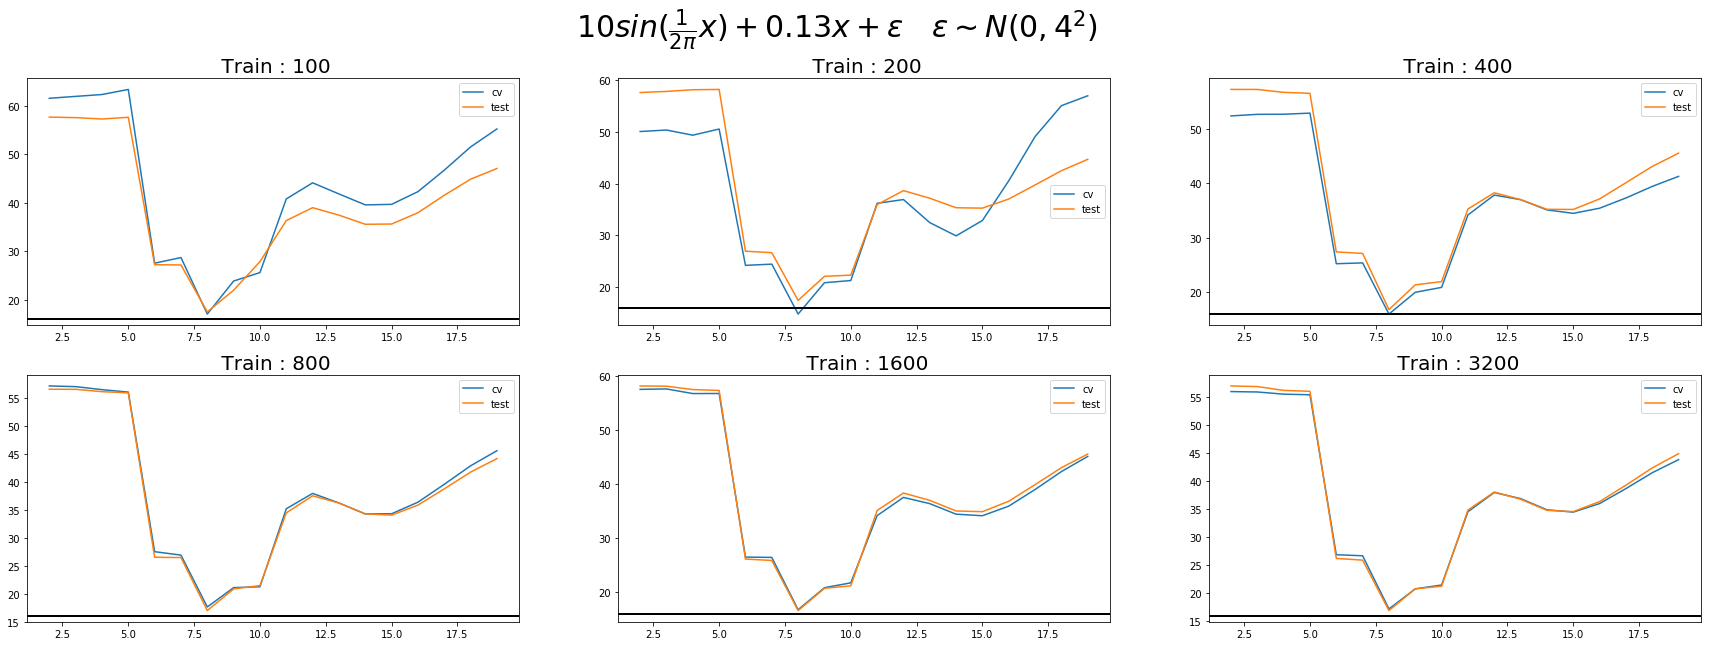

In [5]:
f, ax = plt.subplots( 2,  3, figsize=(30, 10))
train_n = [ 100 , 200 ,400 ,800, 1600 , 3200]
for i , j in enumerate(train_n):
    ax2 = ax.flatten()[i]
    plotting(j , ax2 ) 
f.suptitle(r"$10sin(\frac{1}{2\pi}x) + 0.13x + \epsilon  \quad \epsilon \sim N(0,4^2)$" , fontsize = 30) 
plt.show()